# 🎧 Spotify Songs Analysis Project

In this project we perform an Exploratory Data Analysis (EDA) on a dataset of 114,000 Spotify tracks sourced from Kaggle.

💡 Key columns in this dataset include:

* track_id: The unique Spotify ID for each track.
* artists: Names of the artists who performed the track, separated by ';'.
* album_name: The name of the album in which the track appears.
* track_name: The title of the track.
* popularity: A value between 0 and 100, indicating the track's popularity based on recent plays.
* explicit: Boolean indicating whether the track contains explicit content.
* danceability: Describes how suitable a track is for dancing (0.0 = least danceable, 1.0 = most danceable).
* energy: Represents the intensity and activity of a track (0.0 = low energy, 1.0 = high energy).
* loudness: Overall loudness of the track in decibels (dB).
* valence: Measures the musical positiveness conveyed by a track (0.0 = negative, 1.0 = positive).
* tempo: Estimated tempo of the track in beats per minute (BPM).

## 📁 Importing libraries & inspecting the dataset

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df = pd.read_csv('dataset.csv', index_col=0)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [118]:
df.shape

(114000, 20)

In [119]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


We now check for missing values and dublicated rows

In [120]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [121]:
df.duplicated().sum()

450

## 🧹Cleaning the Dataset

In [122]:
df.dropna(inplace=True)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [123]:
df.drop_duplicates(inplace=True)
df.shape

(113549, 20)

It is important to separate the artists that share a song into multiple rows so we won't be grouping artists in collaborations as if they're a single entity.

In [124]:
df['artists'] = df['artists'].str.split(';')
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,[Gen Hoshino],Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,[Ben Woodward],Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,"[Ingrid Michaelson, ZAYN]",To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,[Kina Grannis],Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,[Chord Overstreet],Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,[Rainy Lullaby],#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,[Rainy Lullaby],#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,[Cesária Evora],Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,[Michael W. Smith],Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [125]:
df_exploded = df.explode('artists')
df_exploded

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [126]:
df_exploded.nunique()

track_id            89740
artists             29859
album_name          46589
track_name          73608
popularity            101
duration_ms         50696
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45652
time_signature          5
track_genre           114
dtype: int64

The data is cleaned up and ready — let’s dive into the analysis!

## 📈 Which genres are the most popular on average?

We begin with exploring which genres are the most popular on average. By grouping the data by genre and calculating the mean popularity score for each, we can identify which styles tend to perform better overall on Spotify. The chart below shows the top 10 genres with the highest average popularity. This doesn't necessarily mean they're the most frequent, but rather that songs within these genres tend to score well in terms of listener engagement.

In [127]:
avg_popularity = df_exploded.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10)
avg_popularity

track_genre
pop-film     59.852383
k-pop        55.020253
chill        53.183358
sad          52.076765
indian       49.839355
grunge       49.636276
pop          49.130460
emo          48.646782
anime        48.395956
sertanejo    47.819686
Name: popularity, dtype: float64

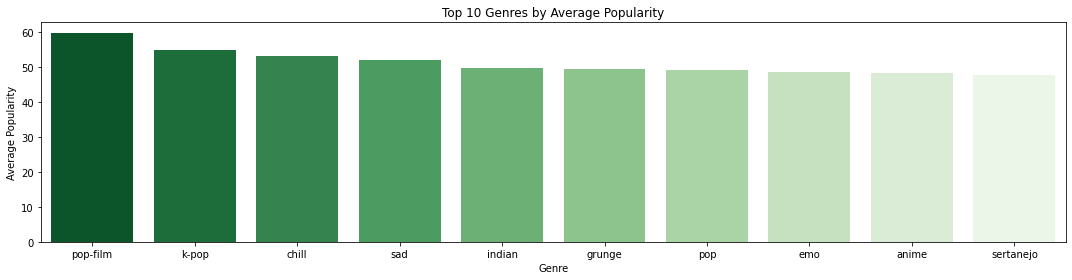

In [174]:
plt.figure(figsize=(15,4))

sns.barplot(x=avg_popularity.index, y=avg_popularity.values, palette='Greens_r', hue=avg_popularity.index, legend=False)
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.tight_layout()

plt.show()

In contrast to the most popular genres, we also examine the genres with the lowest average popularity. These may represent, experimental sounds, or genres with smaller audiences. The bar chart below highlights the bottom 10 genres in terms of average popularity. It's important to note that low popularity doesn't necessarily imply low quality — it may simply reflect more specialized listener bases or limited exposure on the platform.

In [129]:
least_popular = df_exploded.groupby('track_genre')['popularity'].mean().sort_values().head(10)
least_popular

track_genre
iranian            2.251994
romance            3.358102
latin              8.048119
classical         10.482368
detroit-techno    11.584174
chicago-house     12.546816
kids              14.597826
grindcore         14.630478
jazz              15.886777
idm               15.993037
Name: popularity, dtype: float64

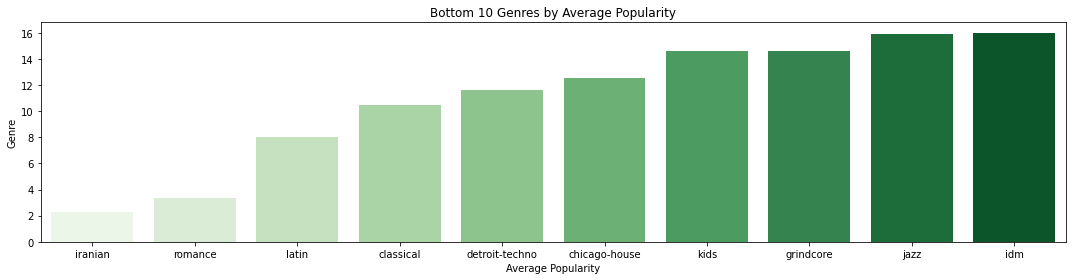

In [175]:
plt.figure(figsize=(15,4))

sns.barplot(x=least_popular.index, y=least_popular.values, palette='Greens', hue=least_popular.index, legend=False)
plt.title('Bottom 10 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.tight_layout()

plt.show()

## 🔊 Audio Features of the most popular genres

In [131]:
top_populars = df_exploded.groupby('track_genre')[['popularity', 'energy', 'danceability', 'valence']].mean().reset_index()
top_populars = top_populars.sort_values(by='popularity', ascending=False).head(10)
top_populars

,track_genre,popularity,energy,danceability,valence
81,pop-film,59.852383,0.618521,0.606537,0.535883
65,k-pop,55.020253,0.669562,0.649909,0.569827
15,chill,53.183358,0.425404,0.663024,0.400388
94,sad,52.076765,0.454377,0.690191,0.412089
55,indian,49.839355,0.613898,0.599664,0.484172
44,grunge,49.636276,0.803317,0.460212,0.399626
80,pop,49.130460,0.625028,0.641341,0.525895
33,emo,48.646782,0.662830,0.611632,0.439027
5,anime,48.395956,0.684395,0.560779,0.448704
97,sertanejo,47.819686,0.719702,0.594527,0.626523


In [132]:
melted = top_populars.melt(id_vars='track_genre', value_vars=['energy', 'danceability', 'valence'],
                           var_name='Feature', value_name='Value')
melted

,track_genre,Feature,Value
0,pop-film,energy,0.618521
1,k-pop,energy,0.669562
2,chill,energy,0.425404
3,sad,energy,0.454377
4,indian,energy,0.613898
5,grunge,energy,0.803317
6,pop,energy,0.625028
7,emo,energy,0.662830
8,anime,energy,0.684395
9,sertanejo,energy,0.719702


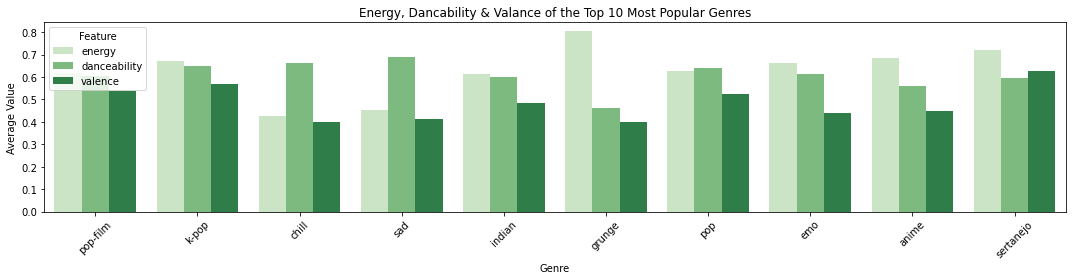

In [161]:
plt.figure(figsize=(15, 4))
sns.barplot(data=melted, x='track_genre', y='Value', hue='Feature', palette='Greens')

plt.title('Energy, Dancability & Valance of the Top 10 Most Popular Genres')
plt.ylabel('Average Value')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

This grouped bar plot shows the average values of three key audio features — energy, danceability, and valence — across the top 10 most popular genres in the dataset. This comparison provides insight into why certain genres may be more popular — not just how popular they are, but how they "feel" to listeners.

## 🎤 Which artists tend to produce the most popular songs?

In [134]:
popular_artists = df_exploded.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
popular_artists

artists
Bizarrap            99.0
Quevedo             99.0
Harry Styles        92.0
Luar La L           90.5
Beach Weather       90.0
Pablo Pesadilla     88.0
Polimá Westcoast    88.0
Olivia Rodrigo      87.4
Lewis Capaldi       87.0
BYOR                87.0
Name: popularity, dtype: float64

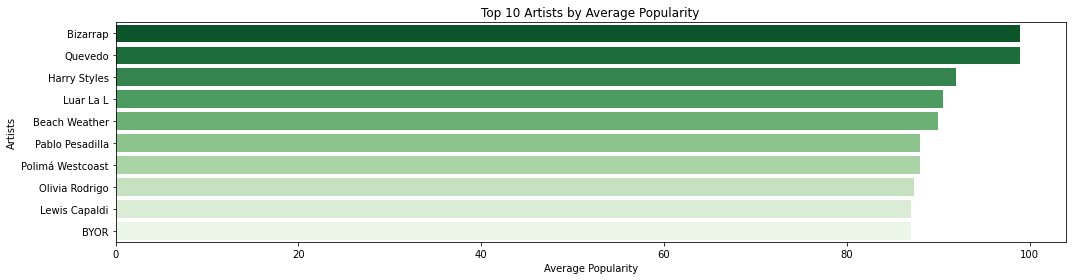

In [176]:
plt.figure(figsize=(15, 4))
sns.barplot(x=popular_artists.values, y=popular_artists.index, palette='Greens_r', hue=popular_artists.index, legend=False)
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artists')
plt.tight_layout()
plt.show()

## 🔞 How many songs contain explicit content overall & by genre?

We will make a pie chart to see what percentage of all tracks have explicit content.

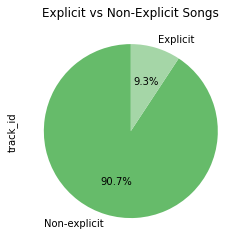

In [167]:
df_exploded.groupby(['explicit'])['track_id'].count().plot.pie(
    labels=['Non-explicit', 'Explicit'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66bb6a', '#a5d6a7'],
    title='Explicit vs Non-Explicit Songs'
)

plt.show()

Next, we will expand our analysis to finding the percentage of explicit content per genre.

In [149]:
genre_explicit_counts = df_exploded.groupby(['track_genre', 'explicit'])['track_id'].count().unstack(fill_value=0)
genre_explicit_counts.columns = ['Non-Explicit', 'Explicit'] 

genre_explicit_percent = genre_explicit_counts.div(genre_explicit_counts.sum(axis=1), axis=0) * 100
genre_explicit_percent = genre_explicit_percent.sort_values(by='Explicit', ascending=False).head(20)
genre_explicit_percent

,Non-Explicit,Explicit
track_genre,,
comedy,36.465116,63.534884
emo,48.508634,51.491366
sad,56.751199,43.248801
j-dance,59.499264,40.500736
hardcore,60.107610,39.892390
funk,60.233029,39.766971
dancehall,68.958991,31.041009
metalcore,69.814815,30.185185
hip-hop,70.623864,29.376136


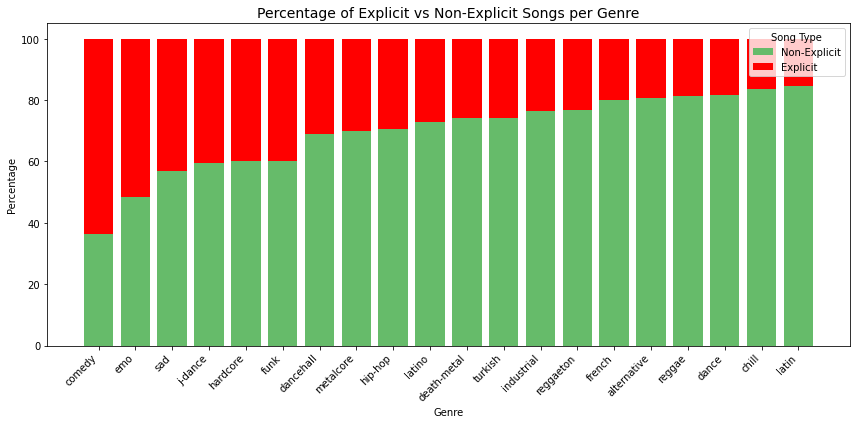

In [173]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Non-Explicit (bottom)
ax.bar(genre_explicit_percent.index, genre_explicit_percent['Non-Explicit'],
       label='Non-Explicit', color='#66bb6a')

# Plot Explicit (top)
ax.bar(genre_explicit_percent.index, genre_explicit_percent['Explicit'],
       bottom=genre_explicit_percent['Non-Explicit'], label='Explicit', color='red')

# Customizing
ax.set_title('Percentage of Explicit vs Non-Explicit Songs per Genre', fontsize=14)
ax.set_ylabel('Percentage')
ax.set_xlabel('Genre')
plt.xticks(rotation=45, ha='right')
ax.legend(title='Song Type')
plt.tight_layout()
plt.show()

This 100% stacked bar chart illustrates the proportion of explicit and non-explicit songs within each genre. By normalizing the values, we can compare genres regardless of how many songs they contain. Genres are sorted by the percentage of explicit songs.

## ⚡️ Do higher energy songs tend to be more loud?

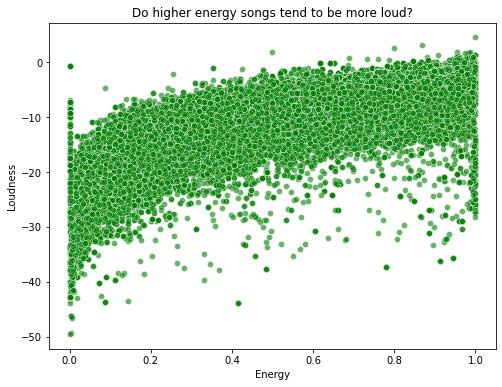

In [169]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_exploded, x="energy", y="loudness", alpha=0.6, color='green')
plt.title("Do higher energy songs tend to be more loud?")
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.show()

In [152]:
correlation = df_exploded['energy'].corr(df_exploded['loudness'])
print(f"Correlation between energy and loudness: {correlation:.2f}")

Correlation between energy and loudness: 0.77


As we can see, energy and loudness have a strong correlation coefficient of almost 0.8. That means that indeed higher energy tracks tend to be louder.

## 🥁 Do faster songs (higher BPM) tend to be more popular?

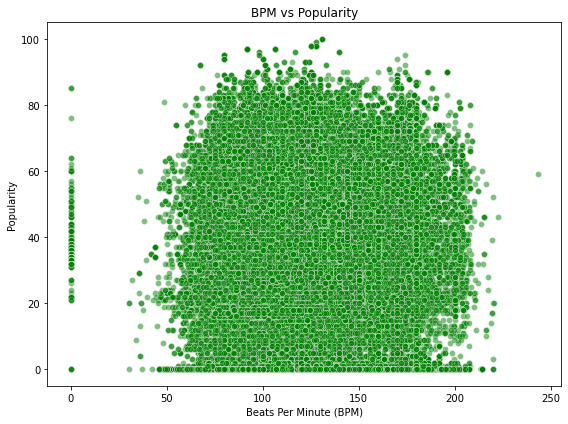

In [168]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_exploded, x='tempo', y='popularity', alpha=0.5, color='green')
plt.title('BPM vs Popularity')
plt.xlabel('Beats Per Minute (BPM)')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

In [154]:
correlation = df_exploded['tempo'].corr(df_exploded['popularity'])
print(f"Correlation between BPM and Popularity: {correlation:.2f}")

Correlation between BPM and Popularity: 0.02


This scatterplot shows the relationship between tempo and song popularity. The correlation coefficient is 0.02, indicating that correlation does not exist between these two metrics.